In [1]:
import umap
import hdbscan
import numpy as np
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
# Dimension reduction and clustering libraries
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
%matplotlib inline

In [2]:
%cd Z:\PPMI_Data\Excels\NonMotors\Derived250\Female\GeneCpG\STAIS
df = pd.read_csv('STAIS_with_MethylomeDetails_Female.csv')
print(df.shape)
df.head(3)

Z:\PPMI_Data\Excels\NonMotors\Derived250\Female\GeneCpG\STAIS
(150, 3050)


,Sentrix,PATNO,Gender,APPRDX,HYS,Age,AgeCate,STAIS_Category,cg26354221,cg02237342,...,cg12383788,cg09938164,cg16043968,cg06398244,cg26924480,cg06985259,cg09180977,cg05600023,cg01781529,cg02839875
0,200973410159_R03C01,3000,2,2,0,69.1,4,1,0.918085,0.016498,...,0.920545,0.820139,0.943315,0.920632,0.876711,0.929227,0.946104,0.848444,0.605773,0.629179
1,200991620021_R03C01,3002,2,1,2,67.6,4,2,0.931688,0.025810,...,0.927666,0.774644,0.944821,0.885769,0.870694,0.933138,0.916203,0.797292,0.631043,0.648518
2,200989060105_R03C01,3003,2,1,2,56.7,3,1,0.958247,0.017621,...,0.934628,0.759664,0.953367,0.912200,0.870518,0.850390,0.919337,0.874751,0.676620,0.673297


In [3]:
df_data = df.drop(['PATNO', 'Sentrix', 'HYS', 'Gender','STAIS_Category','Age','AgeCate','APPRDX'], axis=1)
df_data.head(2)

,cg26354221,cg02237342,cg06516974,cg20660269,cg12793123,cg08025954,cg21584430,cg26001125,cg10766357,cg04250930,...,cg12383788,cg09938164,cg16043968,cg06398244,cg26924480,cg06985259,cg09180977,cg05600023,cg01781529,cg02839875
0,0.918085,0.016498,0.016215,0.014990,0.011442,0.054316,0.864747,0.679647,0.869149,0.769781,...,0.920545,0.820139,0.943315,0.920632,0.876711,0.929227,0.946104,0.848444,0.605773,0.629179
1,0.931688,0.025810,0.022368,0.016941,0.011760,0.064698,0.795468,0.643644,0.833223,0.804937,...,0.927666,0.774644,0.944821,0.885769,0.870694,0.933138,0.916203,0.797292,0.631043,0.648518


In [4]:
df_targets = df[['APPRDX']]

In [5]:
colors = {1:"red", 2: "green"}

In [6]:
clusterable_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0, n_components=2,random_state=42,).fit_transform(df_data)

In [7]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], marker='o',label='Scatter',markerfacecolor='r', markersize=15, color='floralwhite'),
                Line2D([0], [0], marker='o',label='Scatter',markerfacecolor='g', markersize=15, color='floralwhite')]

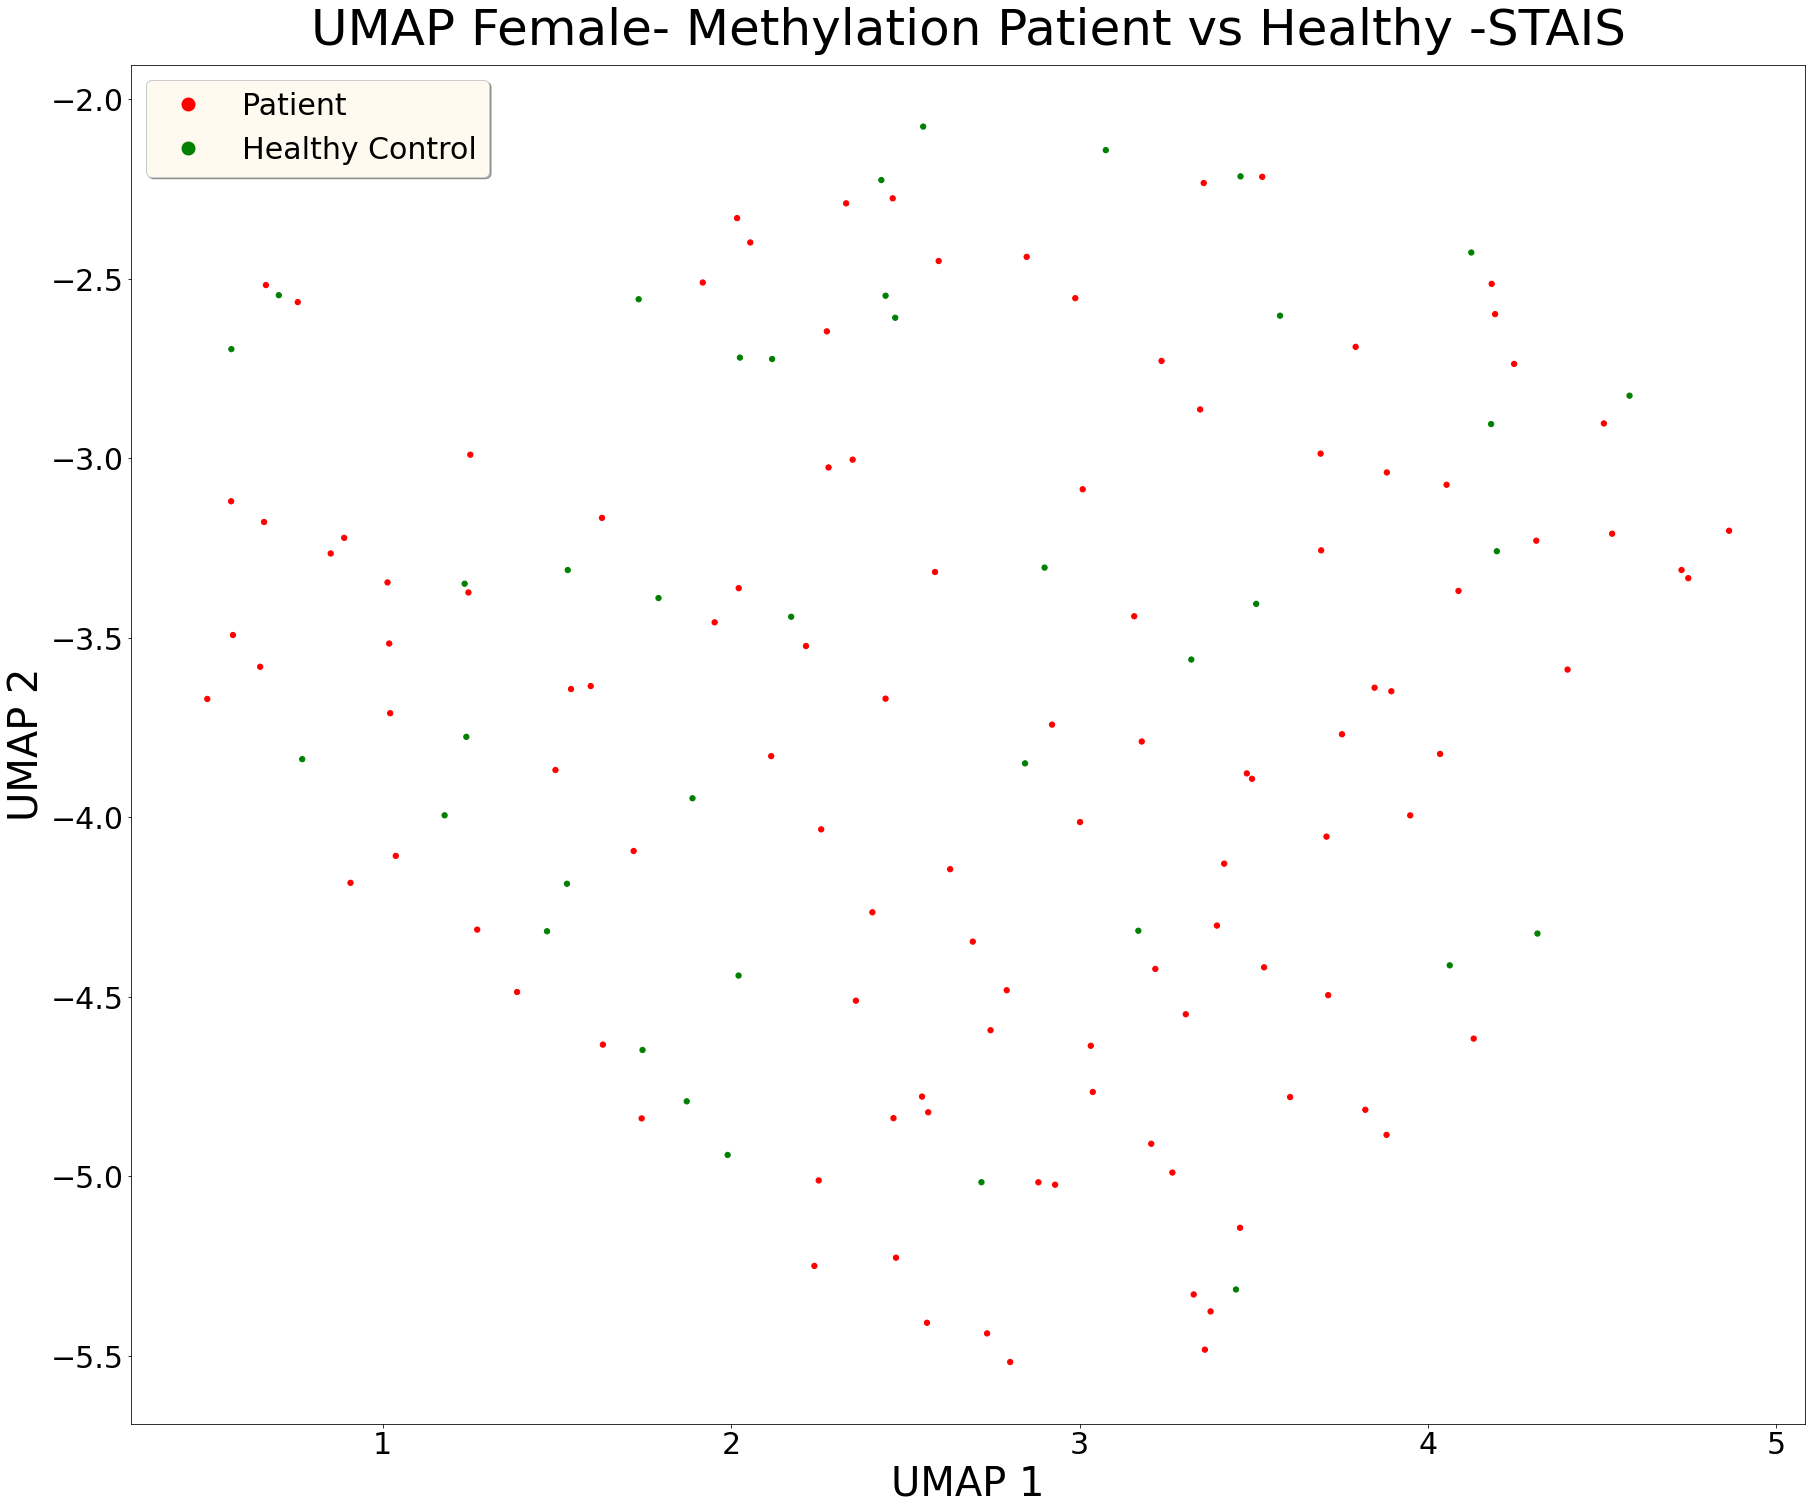

In [9]:
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
c=df_targets['APPRDX'].map(colors), s=28, cmap="Spectral");
plt.rcParams["figure.figsize"] = [30,25]
plt.title(label= "UMAP Female- Methylation Patient vs Healthy -STAIS", fontsize=50, color='black', pad= 20)
plt.xlabel('UMAP 1', fontsize=40, color='black')
plt.ylabel('UMAP 2', fontsize=40, color='black')
plt.xticks(fontsize=30, color='black')
plt.yticks(fontsize=30, color='black')
plt.legend(custom_lines, ['Patient', 'Healthy Control'], loc='upper left',shadow = True,
           facecolor = 'floralwhite',prop = {'size' : 30})
plt.savefig("UMAP_CpG_PatVsHealthy_STAIS.pdf", format="pdf")
plt.savefig("UMAP_CpG_PatVsHealthy_STAIS.svg", format="svg")
plt.show()